In [1]:
import pandas as pd

In [2]:
df=pd.read_csv(r"C:\Users\karth\Downloads\USA House Price Prediction\train.csv")

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

C:\Users\karth\anaconda3\envs\model\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

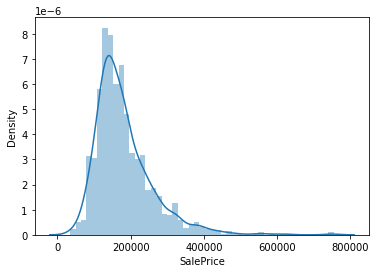

In [5]:
import seaborn as sns
sns.distplot(df.SalePrice)

In [6]:
total=df.isnull().sum().sort_values(ascending=False)

In [7]:
Precentage=(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

In [8]:
Missing_Data=pd.concat([total,Precentage],axis=1,keys=["Total","Precetage"])
Missing_Data

,Total,Precetage
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
...,...,...
CentralAir,0,0.000000
SaleCondition,0,0.000000
Heating,0,0.000000
TotalBsmtSF,0,0.000000


### Na has Some Special meaning have look at DataDescriptiion

In [9]:
## look into each each column in description and know wheter na has meaning or not
null_has_meaning=['Alley','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','BsmtQual',
                 'Fence','Fireplaces','GarageCond','GarageFinish','GarageQual','GarageType','PoolQC','MiscFeature','FireplaceQu']

In [10]:
Missing_Data.index

Index(['PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu', 'LotFrontage',
       'GarageCond', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual',
       'BsmtExposure', 'BsmtFinType2', 'BsmtFinType1', 'BsmtCond', 'BsmtQual',
       'MasVnrArea', 'MasVnrType', 'Electrical', 'Utilities', 'YearRemodAdd',
       'MSSubClass', 'Foundation', 'ExterCond', 'ExterQual', 'Exterior2nd',
       'Exterior1st', 'RoofMatl', 'RoofStyle', 'YearBuilt', 'LotConfig',
       'OverallCond', 'OverallQual', 'HouseStyle', 'BldgType', 'Condition2',
       'BsmtFinSF1', 'MSZoning', 'LotArea', 'Street', 'Condition1',
       'Neighborhood', 'LotShape', 'LandContour', 'LandSlope', 'SalePrice',
       'HeatingQC', 'BsmtFinSF2', 'EnclosedPorch', 'Fireplaces', 'GarageCars',
       'GarageArea', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', '3SsnPorch',
       'BsmtUnfSF', 'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold',
       'SaleType', 'Functional', 'TotRmsAbvGrd', 'KitchenQual', 'KitchenAbvGr',

In [11]:
for i in null_has_meaning:
    df[i].fillna("None",inplace=True)
    
    
# Upto Here we Dealed with none null values which we find using datasets using dataDescription


In [12]:
total=df.isnull().sum().sort_values(ascending=False)
Precentage=(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)
Missing_Data=pd.concat([total,Precentage],axis=1,keys=["Total","Precetage"])

In [13]:
Missing_Data.head(20)

,Total,Precetage
LotFrontage,259,0.177397
GarageYrBlt,81,0.055479
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685
SalePrice,0,0.000000
ExterCond,0,0.000000
RoofStyle,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000


In [14]:
df.drop(["LotFrontage"],axis=1,inplace=True)

In [15]:
total=df.isnull().sum().sort_values(ascending=False)
Precentage=(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)
Missing_Data=pd.concat([total,Precentage],axis=1,keys=["Total","Precetage"])

In [16]:
Missing_Data

,Total,Precetage
GarageYrBlt,81,0.055479
MasVnrType,8,0.005479
MasVnrArea,8,0.005479
Electrical,1,0.000685
SalePrice,0,0.000000
...,...,...
TotRmsAbvGrd,0,0.000000
Functional,0,0.000000
Fireplaces,0,0.000000
FireplaceQu,0,0.000000


(-0.5, 96.5, 0.0, 800000.0)

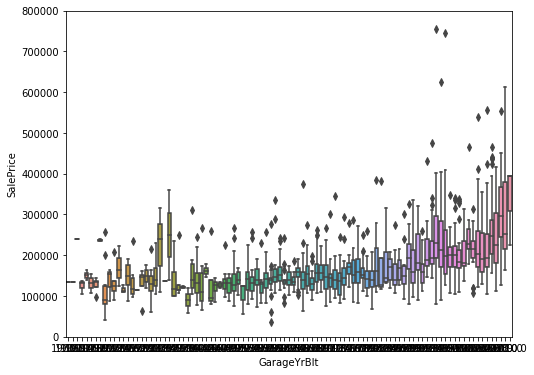

In [17]:
import matplotlib.pyplot as plt
data=pd.concat([df["SalePrice"],df["GarageYrBlt"]],axis=1)
f,ax=plt.subplots(figsize=(8,6))
fig=sns.boxplot(x="GarageYrBlt",y="SalePrice",data=data)
fig.axis(ymin=0,ymax=800000)

In [18]:
df['GarageYrBlt'].fillna(df['GarageYrBlt'].median(),inplace=True)

In [19]:
# if there are no outliers we will replace it with mean

In [20]:
df['MasVnrType'].fillna("None",inplace=True)

In [21]:
df['MasVnrArea'].fillna(df['MasVnrArea'].median(),inplace=True)

In [22]:
total=df.isnull().sum().sort_values(ascending=False)
Precentage=(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)
Missing_Data=pd.concat([total,Precentage],axis=1,keys=["Total","Precetage"])
Missing_Data

,Total,Precetage
Electrical,1,0.000685
SalePrice,0,0.000000
Foundation,0,0.000000
RoofMatl,0,0.000000
Exterior1st,0,0.000000
...,...,...
Functional,0,0.000000
Fireplaces,0,0.000000
FireplaceQu,0,0.000000
GarageType,0,0.000000


In [23]:
df.dropna(inplace=True)

In [24]:
total=df.isnull().sum().sort_values(ascending=False)
Precentage=(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)
Missing_Data=pd.concat([total,Precentage],axis=1,keys=["Total","Precetage"])
Missing_Data

,Total,Precetage
SalePrice,0,0.0
SaleCondition,0,0.0
RoofMatl,0,0.0
Exterior1st,0,0.0
Exterior2nd,0,0.0
...,...,...
Functional,0,0.0
Fireplaces,0,0.0
FireplaceQu,0,0.0
GarageType,0,0.0


In [25]:
df_dtrain=df.dtypes
num_train=df_dtrain[(df_dtrain=='int64')|( df_dtrain=='float64')]

In [26]:
cat_train=df_dtrain[(df_dtrain=='object')]

In [27]:
pd.DataFrame(df.dtypes).value_counts()

object     43
int64      35
float64     2
dtype: int64

In [28]:
numerical_train=list(num_train.index)

In [29]:
categorical_train=list(cat_train.index)

In [30]:
cat_train.index

Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature',
       'SaleType', 'SaleCondition'],
      dtype='object')

C:\Users\karth\anaconda3\envs\model\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

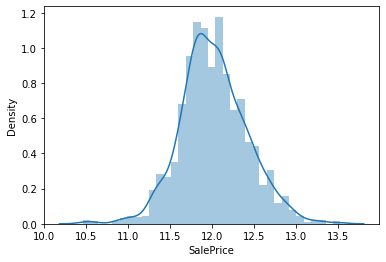

In [31]:
import numpy as np
sns.distplot(np.log(df["SalePrice"]))

In [32]:
df["TransformedPrice"]=np.log(df["SalePrice"])

In [33]:
df["TransformedPrice"]

0       12.247694
1       12.109011
2       12.317167
3       11.849398
4       12.429216
          ...    
1455    12.072541
1456    12.254863
1457    12.493130
1458    11.864462
1459    11.901583
Name: TransformedPrice, Length: 1459, dtype: float64

In [34]:
set(df["MSZoning"])

{'C (all)', 'FV', 'RH', 'RL', 'RM'}

In [35]:
for i in categorical_train:
    feature_set=set(df[i])
    for j in feature_set:
        feature_list=list(feature_set)
        df.loc[df[i]==j,i]=feature_list.index(j)

In [36]:
df.head()

,Id,MSSubClass,MSZoning,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,TransformedPrice
0,1,60,4,8450,0,1,3,2,1,0,...,1,3,1,0,2,2008,5,5,208500,12.247694
1,2,20,4,9600,0,1,3,2,1,1,...,1,3,1,0,5,2007,5,5,181500,12.109011
2,3,60,4,11250,0,1,2,2,1,0,...,1,3,1,0,9,2008,5,5,223500,12.317167
3,4,70,4,9550,0,1,2,2,1,3,...,1,3,1,0,2,2006,5,3,140000,11.849398
4,5,60,4,14260,0,1,2,2,1,1,...,1,3,1,0,12,2008,5,5,250000,12.429216


In [37]:
X=df.drop(["Id","SalePrice","TransformedPrice"],axis=1)

In [38]:
y=df["TransformedPrice"]

In [40]:
from sklearn.model_selection import train_test_split

In [42]:
X_train,x_test,y_train,y_test=train_test_split(X,y,random_state=100,test_size=.30)

In [43]:
params={"alpha":[0.0001,0.001,0.01,0.05,0.1,0.2,0.3,0.4,0.05,0.06,0.07,0.08,0.09,1,2,3,4,5,6,7,8,9,10,20,50,100,500,1000]}

In [47]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [60]:
lasso=Lasso()
folds=5
model_cv=GridSearchCV(estimator=lasso,param_grid=params,scoring="neg_mean_absolute_error",
                      verbose=1,cv=folds,return_train_score=True)
model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    8.5s finished


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.05, 0.06, 0.07, 0.08, 0.09, 1, 2, 3,
                                   4, 5, 6, 7, 8, 9, 10, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [62]:
cv_results=pd.DataFrame(model_cv.cv_results_)
cv_results.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28 entries, 0 to 27
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   mean_fit_time       28 non-null     float64
 1   std_fit_time        28 non-null     float64
 2   mean_score_time     28 non-null     float64
 3   std_score_time      28 non-null     float64
 4   param_alpha         28 non-null     object 
 5   params              28 non-null     object 
 6   split0_test_score   28 non-null     float64
 7   split1_test_score   28 non-null     float64
 8   split2_test_score   28 non-null     float64
 9   split3_test_score   28 non-null     float64
 10  split4_test_score   28 non-null     float64
 11  mean_test_score     28 non-null     float64
 12  std_test_score      28 non-null     float64
 13  rank_test_score     28 non-null     int32  
 14  split0_train_score  28 non-null     float64
 15  split1_train_score  28 non-null     float64
 16  split2_tra

In [63]:
cv_results["param_alpha"]=cv_results["param_alpha"].astype("float64")

In [65]:
cv_results.dtypes

mean_fit_time         float64
std_fit_time          float64
mean_score_time       float64
std_score_time        float64
param_alpha           float64
params                 object
split0_test_score     float64
split1_test_score     float64
split2_test_score     float64
split3_test_score     float64
split4_test_score     float64
mean_test_score       float64
std_test_score        float64
rank_test_score         int32
split0_train_score    float64
split1_train_score    float64
split2_train_score    float64
split3_train_score    float64
split4_train_score    float64
mean_train_score      float64
std_train_score       float64
dtype: object

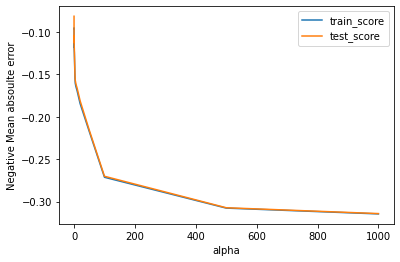

In [73]:
plt.plot(cv_results["param_alpha"],cv_results["mean_test_score"])
plt.plot(cv_results["param_alpha"],cv_results["mean_train_score"])
plt.xlabel("alpha")
plt.ylabel("Negative Mean absoulte error")
plt.legend(["train_score","test_score"],loc="upper right")
plt.show()

In [75]:
alpha=50
lasso=Lasso()
lasso.fit(X_train,y_train)
lasso.coef_

array([-0.00000000e+00,  0.00000000e+00,  1.30278123e-06, -0.00000000e+00,
       -0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00, -0.00000000e+00, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  2.66594385e-03,  1.06540866e-03, -0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        3.87636468e-05,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        4.69885872e-05, -0.00000000e+00,  0.00000000e+00, -0.00000000e+00,
        1.76128183e-04,  0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
       -0.00000000e+00,  0.00000000e+00,  4.55413941e-05, -0.00000000e+00,
        2.79544741e-04,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -0.00000000e+00, -0.00000000e+00,  0.00000000e+00,
        0.00000000e+00, -

In [81]:
ridge=Ridge()
folds=5
model_cv1=GridSearchCV(estimator=ridge,param_grid=params,scoring="neg_mean_absolute_error",
                      verbose=1,cv=folds,return_train_score=True)
model_cv1.fit(X_train,y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 140 out of 140 | elapsed:    5.7s finished


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.05, 0.06, 0.07, 0.08, 0.09, 1, 2, 3,
                                   4, 5, 6, 7, 8, 9, 10, 20, 50, 100, 500,
                                   1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [86]:
cv_results1=pd.DataFrame(model_cv1.cv_results_)
cv_results1.dtypes

mean_fit_time         float64
std_fit_time          float64
mean_score_time       float64
std_score_time        float64
param_alpha            object
params                 object
split0_test_score     float64
split1_test_score     float64
split2_test_score     float64
split3_test_score     float64
split4_test_score     float64
mean_test_score       float64
std_test_score        float64
rank_test_score         int32
split0_train_score    float64
split1_train_score    float64
split2_train_score    float64
split3_train_score    float64
split4_train_score    float64
mean_train_score      float64
std_train_score       float64
dtype: object

In [89]:
cv_results1=cv_results1.astype("float64")

TypeError: float() argument must be a string or a number, not 'dict'

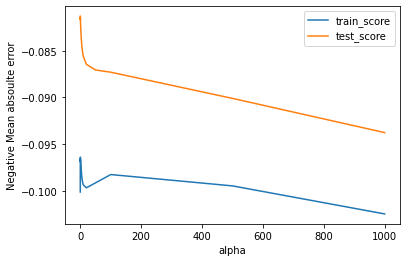

In [90]:
plt.plot(cv_results1["param_alpha"],cv_results1["mean_test_score"])
plt.plot(cv_results1["param_alpha"],cv_results1["mean_train_score"])
plt.xlabel("alpha")
plt.ylabel("Negative Mean absoulte error")
plt.legend(["train_score","test_score"],loc="upper right")
plt.show()

In [92]:
alpha=10
ridge=Ridge(alpha=alpha)
ridge.fit(X_train,y_train)

Ridge(alpha=10)

In [94]:
ridge.coef_

array([-2.87173730e-04,  7.16131012e-03,  1.42438408e-06, -6.32049551e-02,
       -4.13537068e-02,  7.26753767e-04, -2.86050415e-02,  1.89425174e-02,
        5.34842422e-03,  1.60014556e-02,  5.63354551e-04, -1.05857893e-02,
       -8.49963291e-02,  2.66810289e-02, -2.22292286e-03,  6.67022456e-02,
        4.27026996e-02,  2.30232318e-03,  9.10039421e-04,  2.14935076e-03,
       -1.32893803e-02,  4.47606764e-03, -4.77808945e-03,  1.13987690e-03,
        2.06529035e-05,  5.15393510e-03,  8.23915417e-03,  2.03197690e-02,
       -4.77039977e-03,  1.61520747e-04, -5.38831098e-03, -1.71396549e-03,
        3.88039577e-05, -3.43872974e-03,  3.06746695e-05, -1.17882327e-05,
        5.76903930e-05, -7.95946596e-03, -7.69472883e-03,  5.45248669e-02,
       -7.17608361e-03,  7.33930181e-05,  4.82107704e-05,  3.63015142e-05,
        1.57905310e-04,  4.94953538e-02,  1.25126821e-02,  3.02083292e-02,
        9.43656269e-03,  2.16957948e-03, -5.03745696e-02,  2.61450378e-02,
        9.46327069e-03, -